# Feature

In [1]:
# Feature: It describes about the dataset (column headings).

# Scale

In [2]:
# Scale: The range of values in a column is called scale.

# Feature Scaling

In [3]:
# Feature Scaling: It is a method to scale numeric features in the same scale or range (like -1 to 1, 0 to 1).

In [4]:
# This is the last step involved in data preprocessing and before ML model training.

In [5]:
# It is also called as data normalization.

In [6]:
# We apply feature scaling to independent variables only.

In [7]:
# We fit feature scaling with train data and transform on train and test data.

# Why Feature Scaling

In [8]:
# The scale of raw features is different according to different units.
# ML algorithms cannot understand features,it understands only numbers.
    # Ex: Consider heights of two persons 8.2 feet and 140cm. We know that 8.2 feet > 140cm. But Machine Learning doesn't 
    # understand units and assumes 140cm > 8.2 feet due to its magnitude.

# Which ML Algorithms require Feature Scaling?

In [9]:
# Those Algorithms which calculates the distance:
    # K-Nearest Neighbours (KNN)
    # K-Means
    # Support Vector Machine (SVM)
    # Principal Component Analysis (PCA)
    # Linear Discriminant Analysis
        # Note: Since distance calculation may involve different units like cm, feet we use feature scaling.
# Gradient Descent Based Algorithms:
    # Linear Regression
    # Logistic Regression
    # Neural Network
        # Note: Since the algorithms use Gradient descent which considers units as a base, we use feature scaling.

In [10]:
# Algorithms which doesnot require feature scaling:-
    # Tree Based Algorithms:
        # Decision Tree
        # Random Forest
        # XGBoost (Extreme Gradient Boost)

# Types of Feature Scaling

In [11]:
# Min Max Scaler (Normalization)
# Standard Scaler (Standardization)
# Max Abs Scaler
# Robust Scaler
# Quantile Transformer Scaler
# Power Transformer Scaler
# Unit Vector Scaler

In [12]:
# We mainly use Min Max and Standard Scaler.

# What is Standardization

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 

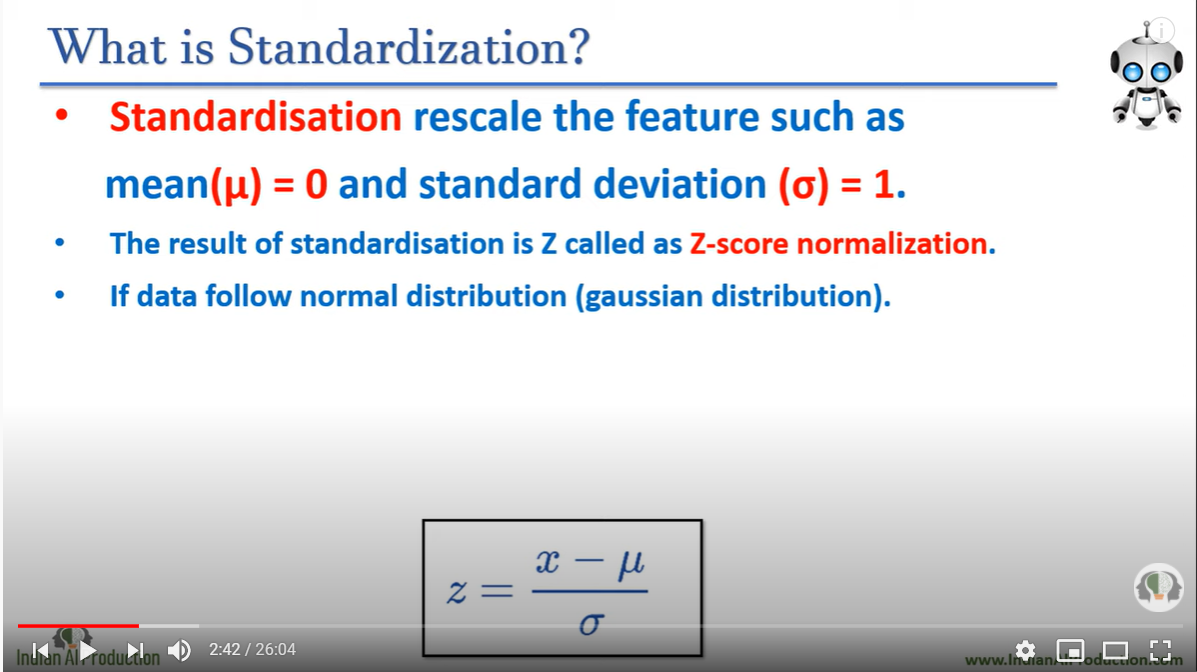

In [14]:
Image(filename = "Standardization.png",width=500)

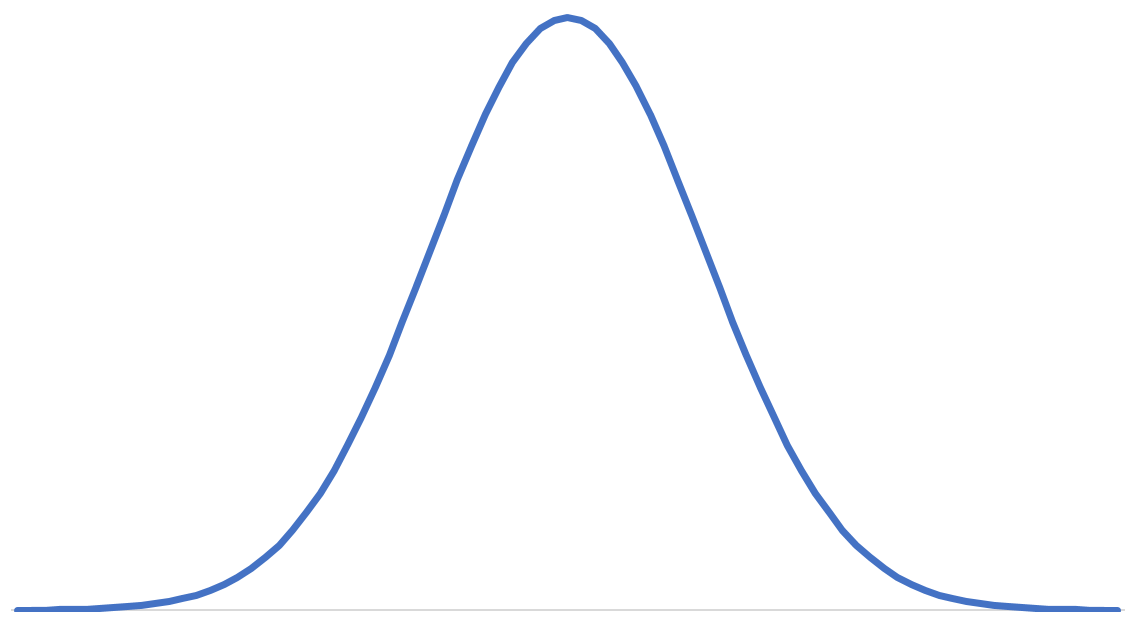

In [15]:
# Gaussian Distribution / Bell Curve/ Normal Distribution
Image(filename = "bellCurve1.png",width=300)

In [16]:
# If the gaussian distribution is noraml (like the one above), then the standardized distribution will be normal.
# If the gaussian distribution is skewed, then the standardized distribution will be skewed.
# Hence before and after standardization the gaussian distribution curve will have the same shape.

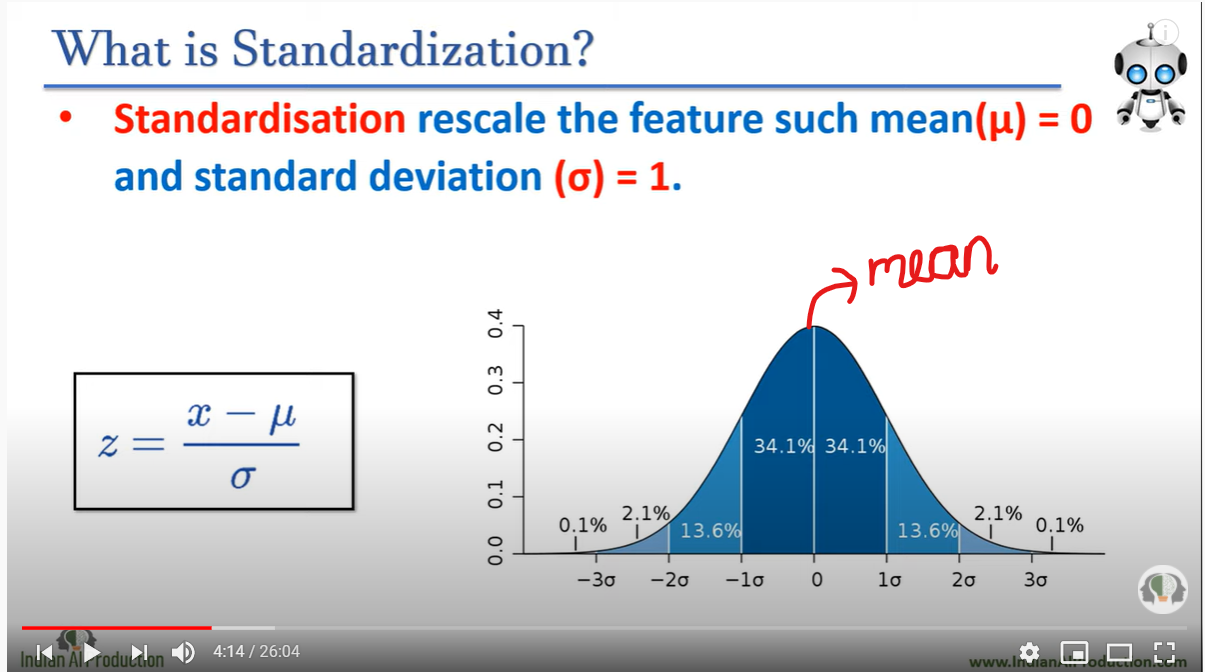

In [17]:
Image(filename = "Standardization2.png",width =500)

# What is Normalization

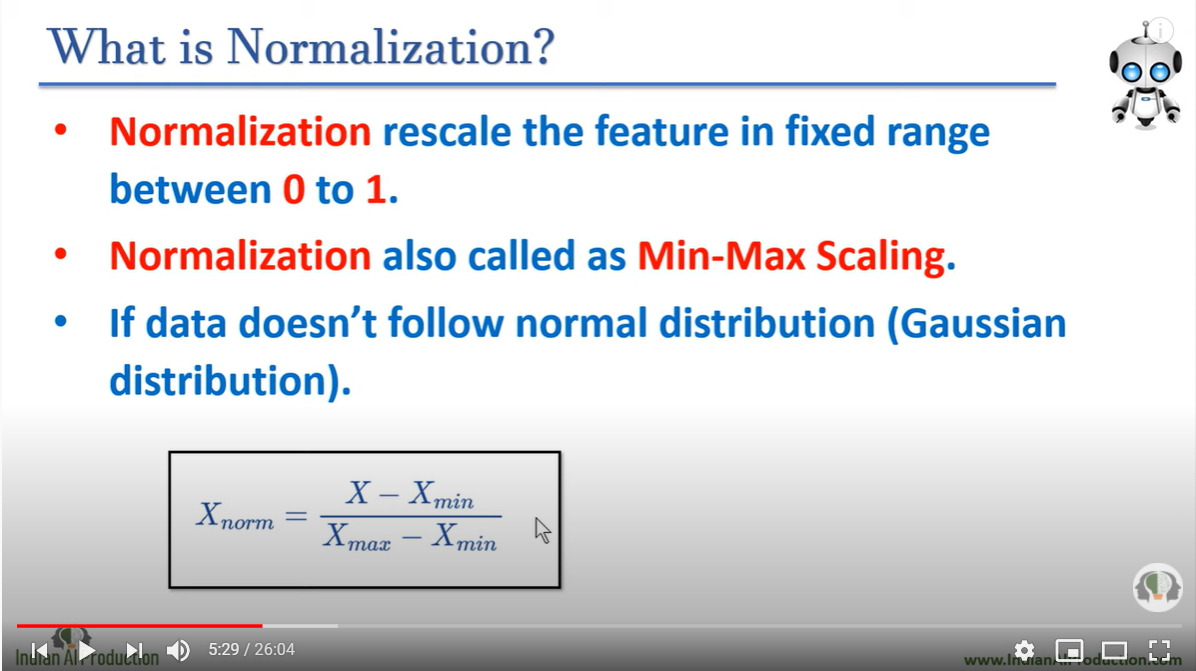

In [18]:
Image(filename = "Normalization.png",width=500)

# Standardization Vs Normalization

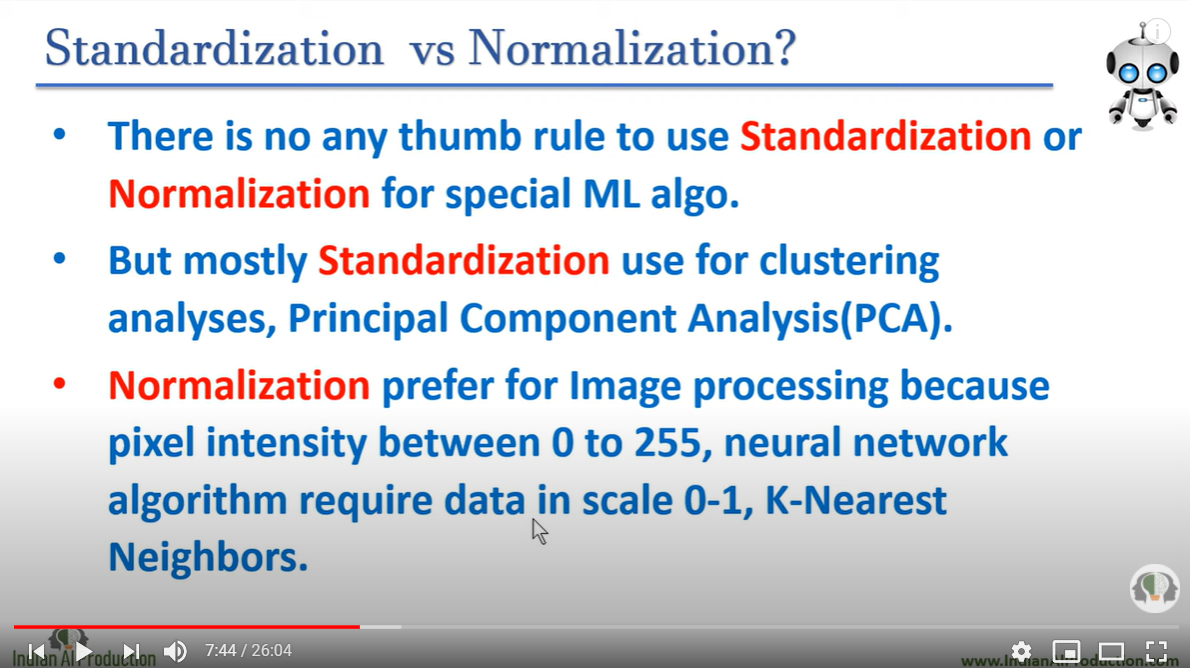

In [19]:
Image(filename = "Standardization vs Normalization.png",width=500)

In [20]:
# importing libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
# Feature Scaling is done after cleaning of data and only on numeric data. The below code is only a
# demonstration of the feature scaling. Make sure to clean the data and use dummy variables first.

In [23]:
df2=df[["survived","pclass","age","parch"]]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [24]:
# survived: Target variable
# pclass: Passenger class
# age: age
# parch: no. of parents and children aboard.

In [25]:
# We are cleaning this data by filling in the missing values with their mean
df3=df2.fillna(df2.mean())
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [26]:
x=df3.drop(columns="survived",axis=1)     # Matrix of training data
x

,pclass,age,parch
0,3,22.000000,0
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,0
888,3,29.699118,2
889,1,26.000000,0


In [27]:
y= df3["survived"]         # Vector of testing data
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [28]:
x.shape,y.shape

((891, 3), (891,))

In [29]:
# Now we first divide the data into training and testing data.
from sklearn.model_selection import train_test_split

In [30]:
# To split data we use train_test_split(training matrix, testing vector, test_size= size of testing data in fraction,
# random_state= any number which stores the particular random splitting of data)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [31]:
x_train.shape

(712, 3)

In [32]:
x_test.shape

(179, 3)

In [33]:
y_train.shape

(712,)

In [34]:
y_test.shape

(179,)

In [35]:
# You must keep in mind that first you split the data into training and testing data and then you apply feature scaling.

In [36]:
# Now we create a model/object StandardScaler() to standardize the data and fit the training data (x_train).
# We fit x_train because we use the mean and standard deviation of the training data in the test dataset.

In [37]:
std_scaler = StandardScaler()

In [38]:
std_scaler.fit(x_train)

StandardScaler()

In [39]:
# To check the mean
std_scaler.mean_

array([ 2.30617978, 29.98832906,  0.38764045])

In [40]:
# To check the standard deviation
std_scaler.scale_

array([ 0.84405789, 13.12048065,  0.81334656])

In [41]:
# To get the Statistics, we use describe() method
x_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.988329,0.387640
std,0.844651,13.129704,0.813918
min,1.000000,0.420000,0.000000
25%,1.750000,22.750000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,36.000000,0.000000
max,3.000000,80.000000,6.000000


In [42]:
# Now we transform the the data which in return returns an 2D array
x_train_std=std_scaler.transform(x_train)
x_test_std=std_scaler.transform(x_test)

In [43]:
x_train_std

array([[-1.54750023, -0.8374944 , -0.47659936],
       [-0.36274737,  0.3057564 ,  0.75288884],
       [ 0.8220055 , -2.13317864,  0.75288884],
       ...,
       [-1.54750023,  0.38197312, -0.47659936],
       [ 0.8220055 ,  0.15332296, -0.47659936],
       [-1.54750023,  0.07710624, -0.47659936]])

In [44]:
# Hence Standardization is done.

In [45]:
x_train_std= pd.DataFrame(data=x_train_std,columns=["pclass","age","parch"])
x_test_std = pd.DataFrame(data=x_test_std ,columns=["pclass","age","parch"])

In [46]:
x_train_std.head()

,pclass,age,parch
0,-1.547500,-0.837494,-0.476599
1,-0.362747,0.305756,0.752889
2,0.822005,-2.133179,0.752889
3,-0.362747,-0.380194,-0.476599
4,0.822005,-0.608844,-0.476599


In [47]:
x_test_std.head()

,pclass,age,parch
0,0.822005,-0.022043,-0.476599
1,0.822005,-0.022043,-0.476599
2,0.822005,0.381973,-0.476599
3,0.822005,-0.303977,-0.476599
4,0.822005,0.153323,-0.476599


In [48]:
x_train_std.describe()

,pclass,age,parch
count,7.120000e+02,7.120000e+02,7.120000e+02
mean,1.278628e-17,2.295487e-16,8.264301e-17
std,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.547500e+00,-2.253601e+00,-4.765994e-01
25%,-6.589356e-01,-5.516817e-01,-4.765994e-01
50%,8.220055e-01,-2.204275e-02,-4.765994e-01
75%,8.220055e-01,4.581898e-01,-4.765994e-01
max,8.220055e-01,3.811726e+00,6.900330e+00


In [49]:
# You can see that mean should be zero and std deviation to be one.Since the data is in float we do not get perfect 0's and 1's
# and hence after rounding off the values we get mean to be zero.
x_train_std.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.25,-0.48
25%,-0.66,-0.55,-0.48
50%,0.82,-0.02,-0.48
75%,0.82,0.46,-0.48
max,0.82,3.81,6.90


In [50]:
# Now we normalize the data

In [51]:
x_train.head()

,pclass,age,parch
887,1,19.0,0
416,2,34.0,1
479,3,2.0,1
134,2,25.0,0
588,3,22.0,0


In [52]:
x_test.head()

,pclass,age,parch
126,3,29.699118,0
354,3,29.699118,0
590,3,35.000000,0
509,3,26.000000,0
769,3,32.000000,0


In [53]:
mm_scaler=MinMaxScaler()

In [54]:
mm_scaler.fit(x_train)

MinMaxScaler()

In [55]:
x_train_nrmlized=mm_scaler.transform(x_train)
x_test_nrmlized=mm_scaler.transform(x_test)

In [56]:
x_train_nrmlized,x_test_nrmlized

(array([[0.        , 0.23347575, 0.        ],
        [0.5       , 0.42196532, 0.16666667],
        [1.        , 0.01985423, 0.16666667],
        ...,
        [0.        , 0.43453129, 0.        ],
        [1.        , 0.39683338, 0.        ],
        [0.        , 0.3842674 , 0.        ]]),
 array([[1.        , 0.36792055, 0.        ],
        [1.        , 0.36792055, 0.        ],
        [1.        , 0.43453129, 0.        ],
        [1.        , 0.32143755, 0.        ],
        [1.        , 0.39683338, 0.        ],
        [0.        , 0.79894446, 0.        ],
        [0.        , 0.40939935, 0.        ],
        [1.        , 0.03242021, 0.33333333],
        [0.        , 0.19577783, 0.16666667],
        [1.        , 0.52249309, 0.        ],
        [1.        , 0.27117366, 0.        ],
        [0.        , 0.36792055, 0.        ],
        [1.        , 0.36792055, 0.        ],
        [0.        , 0.63558683, 0.        ],
        [1.        , 0.23347575, 0.        ],
        [0.5       

In [57]:
x_train_nrmlized_df=pd.DataFrame(data=x_train_nrmlized,columns=["pclass","age","parch"])
x_test_nrmlized_df=pd.DataFrame(data=x_test_nrmlized,columns=["pclass","age","parch"])

In [58]:
x_train_nrmlized_df.head()

,pclass,age,parch
0,0.0,0.233476,0.000000
1,0.5,0.421965,0.166667
2,1.0,0.019854,0.166667
3,0.5,0.308872,0.000000
4,1.0,0.271174,0.000000


In [59]:
x_test_nrmlized_df.head()

,pclass,age,parch
0,1.0,0.367921,0.0
1,1.0,0.367921,0.0
2,1.0,0.434531,0.0
3,1.0,0.321438,0.0
4,1.0,0.396833,0.0


In [60]:
x_test_nrmlized_df.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.66,0.35,0.06
std,0.40,0.16,0.13
min,0.00,0.00,0.00
25%,0.50,0.26,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,0.80,0.83


In [61]:
# You can see the values are btw 0 and 1 and hence the dataset is normalized.

In [62]:
# You can use  a pairplot to verify that the distribution doesn't change when you standardize or normalize the data when
# compared to original data

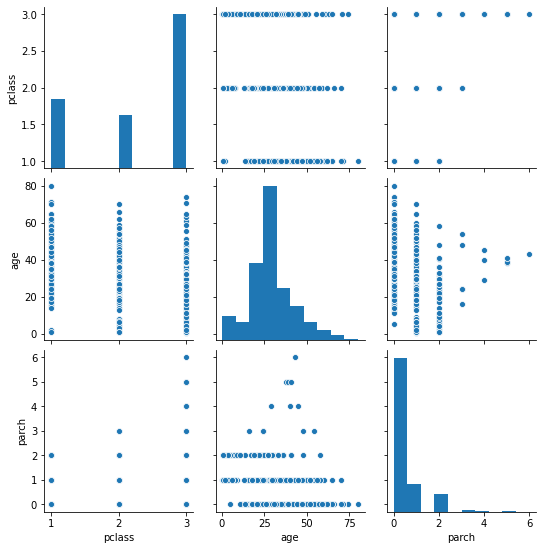

In [63]:
sns.pairplot(x_train)

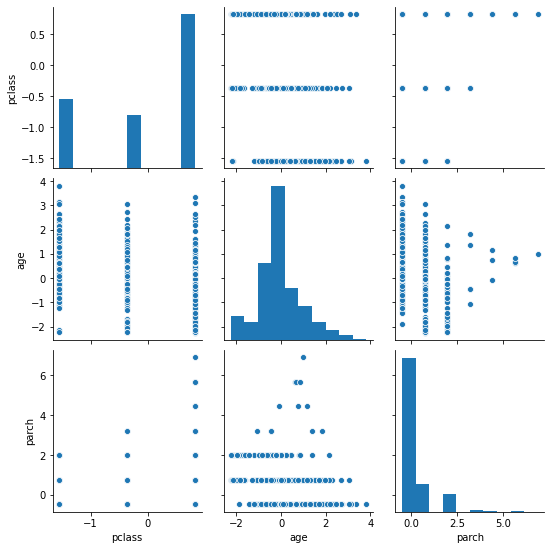

In [64]:
sns.pairplot(x_train_std)

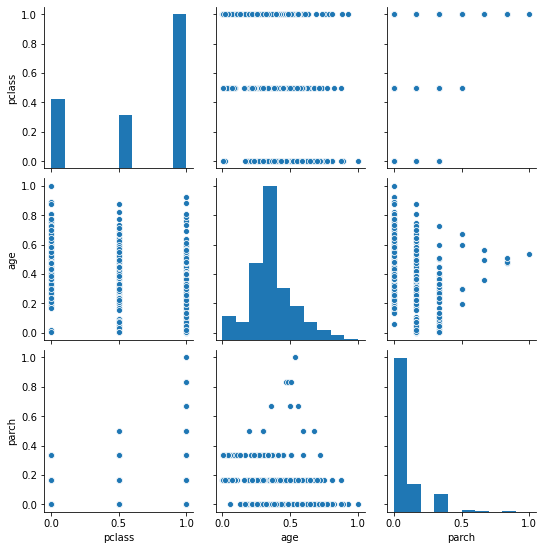

In [65]:
sns.pairplot(x_train_nrmlized_df)

In [66]:
# Since all the distributions are almost same, we can derive to the result that there is no change in the distribution curve
# when data is standardized or normalized.

In [67]:
# We use StandardScaler() method only to those which follow Normal Distribution. If the distribution is right skewed, then
# we can convert it into Normal Distribution by taking logarithm on that column and hence, the skewed graph is also called
# logarithmic Normal Distribution.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


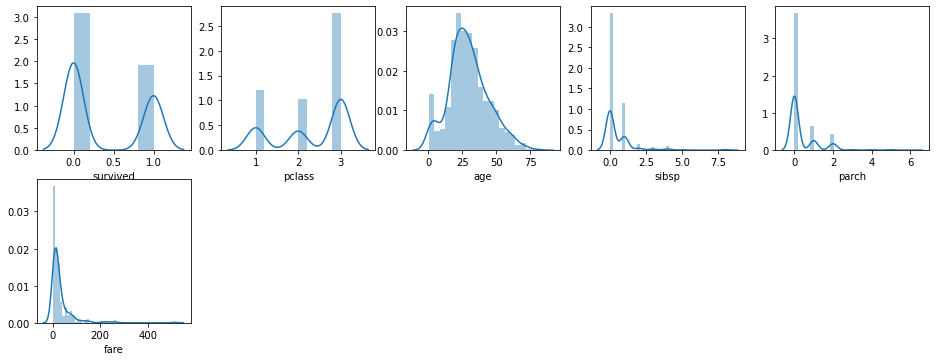

In [69]:
import matplotlib.pyplot as plt
var=0
plt.figure(figsize=[16,9])
for i in df.select_dtypes(include=["int64","float64"]).keys():
    var+=1
    plt.subplot(3,5,var)
    sns.distplot(df[i])